In [26]:
#
###### README ######
#
### Data Columns in the xlsx file - sheet 0 ###
# col1 Date
# col2 Open
# col3 High
# col4 Low
# col5 Close
# col6 Volume
# col7 Stock Adj Close Price (Y)
# col8 Sentiment Score1   (X1)  Financial Dictionary approach
# col9 Sentiment Score2   (X2)  Harvard Dictionary approach
# col10 Sentiment Score3  (X3)  Naive Bayes approach

# Evaluate 3 linear models
# Predict Stock Price (Y) using Sentiment Score1 (Financial Dictionary)
# Predict Stock Price (Y) using Sentiment Score2 (Harvard Dictionary)
# Predict Stock Price (Y) using Sentiment Score2 (Naive Bayes)

# Evaluate quadratic or cubic model (depending on linear model results)

In [1]:
import numpy as np
import tensorflow as tf
import xlrd

DATA_FILE = 'SentimentVsClosePrices.TSLA.xlsx'
STOCK = 'TSLA'
#DATA_FILE = 'SentimentVsClosePrices.AAPL.xlsx'
#STOCK = 'AAPL'
#DATA_FILE = 'SentimentVsClosePrices.FB.xlsx'
#STOCK = 'FB'

# column indices for X1, X2, X3, Y
STOCK_PRICE_COLUMN=6
SENTIMENT_SCORE_FINANCIAL_COLUMN=7
SENTIMENT_SCORE_HARVARD_COLUMN=8
SENTIMENT_SCORE_BAYES_COLUMN=9

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
n_samples = sheet.nrows - 1
print('total samples: {0}'.format(n_samples))

# Step 2: use 80% of data for training, remaining for test.
train_samples = int(0.8*n_samples)
train_data = np.asarray([sheet.row_values(i) for i in range(1, train_samples)])
test_samples = n_samples - train_samples
test_data = np.asarray([sheet.row_values(i) for i in range(train_samples+1, n_samples)])

# train samples
print('\nnumber of train samples: {0}'.format(train_samples))
print('Train sentiment scores {0}'.format(train_data.T[SENTIMENT_SCORE_FINANCIAL_COLUMN]))
print('Train close prices {0}'.format(train_data.T[STOCK_PRICE_COLUMN]))

# test samples
print('\nnumber of test samples: {0}'.format(test_samples))
print('Test sentiment scores: {0}'.format(test_data.T[SENTIMENT_SCORE_FINANCIAL_COLUMN]))

total samples: 42

number of train samples: 33
Train sentiment scores [-0.00331675 -0.07766722 -0.02321725 -0.05223881 -0.01879491 -0.08015478
 -0.0331675  -0.01271421 -0.05859591 -0.13294638 -0.06965174 -0.05334439
 -0.06135987 -0.0724157  -0.04449972  0.0145937  -0.01437258  0.
 -0.04477612 -0.04864566 -0.04035379 -0.04532891 -0.05583195 -0.03814262
 -0.02404643 -0.12880044 -0.04145937 -0.02155887 -0.16362631 -0.1907131
 -0.11304588 -0.0657822 ]
Train close prices [ 250.479996  251.570007  251.210007  248.589996  246.869995  244.899994
  243.690002  246.169998  258.        255.729996  262.049988  261.5
  261.920013  250.679993  255.009995  254.779999  263.160004  270.220001
  277.450012  277.380005  277.920013  278.299988  298.519989  303.700012
  295.        298.700012  302.540009  312.390015  308.709991  296.839996
  304.        301.440002]

number of test samples: 9
Test sentiment scores: [-0.09010503 -0.36777225 -0.13515755 -0.08126036 -0.06826976 -0.08446656
 -0.04090658 -0.0998

In [2]:
# Step 3: create placeholders for input X (Sentiment Scores from different models) and label Y (Close Price)
X1 = tf.placeholder(tf.float32, name='X1')     # Sentiment Score (Financial Dictionary)
Y1 = tf.placeholder(tf.float32, name='Y1')

X2 = tf.placeholder(tf.float32, name='X2')     # Sentiment Score (Harvar Dictionary)
Y2 = tf.placeholder(tf.float32, name='Y2')

X3 = tf.placeholder(tf.float32, name='X3')
Y3 = tf.placeholder(tf.float32, name='Y3')

print(X1, X2, X3)
print(Y1, Y2, Y3)

# Step 4: create weight and bias, initialized to 0
w1 = tf.Variable(0.0, name='weights_1')
b1 = tf.Variable(0.0, name='bias_1')

w2 = tf.Variable(0.0, name='weights_2')
b2 = tf.Variable(0.0, name='bias_2')

w3 = tf.Variable(0.0, name='weights_3')
b3 = tf.Variable(0.0, name='bias_3')

print(w1, w2, w3)
print(b1, b2, b3)

# Step 5: build model to predict Y
Y1_predicted = (X1 * w1) + b1 
Y2_predicted = (X2 * w2) + b2
Y3_predicted = (X3 * w3) + b3

print(Y1_predicted, Y2_predicted, Y3_predicted)

Tensor("X1:0", dtype=float32) Tensor("X2:0", dtype=float32) Tensor("X3:0", dtype=float32)
Tensor("Y1:0", dtype=float32) Tensor("Y2:0", dtype=float32) Tensor("Y3:0", dtype=float32)
Tensor("weights_1/read:0", shape=(), dtype=float32) Tensor("weights_2/read:0", shape=(), dtype=float32) Tensor("weights_3/read:0", shape=(), dtype=float32)
Tensor("bias_1/read:0", shape=(), dtype=float32) Tensor("bias_2/read:0", shape=(), dtype=float32) Tensor("bias_3/read:0", shape=(), dtype=float32)
Tensor("add:0", dtype=float32) Tensor("add_1:0", dtype=float32) Tensor("add_2:0", dtype=float32)


In [3]:
# Step 6: use the square error as the loss function
loss1 = tf.square(Y1 - Y1_predicted, name='loss1')
tf.summary.scalar("loss1", loss1)

loss2 = tf.square(Y2 - Y2_predicted, name='loss2')
tf.summary.scalar("loss2", loss2)

loss3 = tf.square(Y3 - Y3_predicted, name='loss3')
tf.summary.scalar("loss3", loss3)

learning_rate = 0.0001
train_times=1000      # train the model 1000 times

# Step 7: using gradient descent with the configured learning rate to minimize loss
optimizer1 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss1)
optimizer2 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss2)
optimizer3 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss3)

In [4]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    writer = tf.summary.FileWriter('C:/cygwin64/home/mpatnam/CSCIE63/Project/tensorboard/'+STOCK+'.regression', sess.graph)
    # Collect all summary Ops in graph
    summ = tf.summary.merge_all()

    # Step 8: train all models
    for i in range(train_times):
        total_loss1 = total_loss2 = total_loss3 = 0
        # x: SentimentScore
        # y: Stock Close Price
        for n, _, _, _, _, _, y, x1, x2, x3, _ in train_data:
            # Session runs train_op and fetch values of loss
            #print('n:{0}, x:{1}, y:{2}'.format(n, x, y))
            _, _, _, l1, l2, l3, s = sess.run([optimizer1, optimizer2, optimizer3, loss1, loss2, loss3, summ], feed_dict={X1: x1, X2: x2, X3: x3, Y1: y, Y2: y, Y3: y}) 
            total_loss1 += l1
            total_loss2 += l2
            total_loss3 += l3
        print('Average Loss epoch {0}: {1} {2} {3}'.format(i, total_loss1/n_samples, total_loss2/n_samples, total_loss3/n_samples))
        if i % 10 == 0:
            writer.add_summary(s, i)
            
    # close the writer when you're done using it
    writer.close() 

    # Step 11: output the values of w and b
    w1_value, b1_value = sess.run([w1, b1]) 
    w2_value, b2_value = sess.run([w2, b2]) 
    w3_value, b3_value = sess.run([w3, b3]) 

Average Loss epoch 0: 56472.47312127976 56470.98772321428 56439.24516369047
Average Loss epoch 1: 55756.54027157738 55751.98260788691 55653.94614955357
Average Loss epoch 2: 55049.74469866072 55042.18843005953 54879.61253720238
Average Loss epoch 3: 54351.96986607143 54341.488374255954 54116.091517857145
Average Loss epoch 4: 53663.099888392855 53649.76525297619 53363.234095982145
Average Loss epoch 5: 52983.01971726191 52966.90466889881 52620.88811383928
Average Loss epoch 6: 52311.61755952381 52292.79296875 51888.906529017855
Average Loss epoch 7: 51648.78376116072 51627.31789434524 51167.14769345238
Average Loss epoch 8: 50994.410435267855 50970.367838541664 50455.46800595238
Average Loss epoch 9: 50348.38588169643 50321.83454241072 49753.72516741072
Average Loss epoch 10: 49710.606119791664 49681.61151413691 49061.779203869046
Average Loss epoch 11: 49080.966703869046 49049.588541666664 48379.49609375
Average Loss epoch 12: 48459.359654017855 48425.66229538691 47706.74367559524
Ave

In [5]:
# calculate squared value (for RMSE purpose) given a predicted and actual value
def squared_error(pred, actual):
    return (pred - actual) ** 2

def predict_for_test(model_name, price_idx, w_value, b_value):
    # Step 9: report results
    print('_________________________________________________')
    print('Model: {0}'.format(model_name))
    print('_________________________________________________')
    print('Weight:{0}'.format(w_value))
    print('Bias: %2.5f' % b_value)

    #access test columns
    X, Y = test_data.T[price_idx], test_data.T[STOCK_PRICE_COLUMN]
    print('Test Sentiment Scores: {0}'.format(X))

    Y_predicted_test = X * w_value + b_value
    print('Predicted Stock Price using test data:{0}'.format(Y_predicted_test))
    print('Actual Stock Price:{0}'.format(Y))

    # measure RMSE accuracy
    accuracy_rmse = np.sqrt(squared_error(Y_predicted_test, Y).mean())
    print('Model accuracy using RMSE: ', accuracy_rmse)
    
# model-1
predict_for_test("SentimentScore(Financial) vs Stock Price", SENTIMENT_SCORE_FINANCIAL_COLUMN, w1_value, b1_value)
# model-2
predict_for_test("SentimentScore(Harvard) vs Stock Price", SENTIMENT_SCORE_HARVARD_COLUMN, w2_value, b2_value)
# model-3
predict_for_test("SentimentScore(Naive Bayes) vs Stock Price", SENTIMENT_SCORE_BAYES_COLUMN, w3_value, b3_value)

_________________________________________________
Model: SentimentScore(Financial) vs Stock Price
_________________________________________________
Weight:-17.47644805908203
Bias: 270.79114
Test Sentiment Scores: [-0.09010503 -0.36777225 -0.13515755 -0.08126036 -0.06826976 -0.08446656
 -0.04090658 -0.09983416]
Predicted Stock Price using test data:[ 272.36585358  277.21849032  273.15321152  272.21128024  271.98425065
  272.26731308  271.50603938  272.53588425]
Actual Stock Price:[ 305.519989  302.51001   305.600006  308.029999  313.790009  310.170013
  308.630005  314.070007]
Model accuracy using RMSE:  35.9900003771
_________________________________________________
Model: SentimentScore(Harvard) vs Stock Price
_________________________________________________
Weight:-27.739118576049805
Bias: 269.48581
Test Sentiment Scores: [-0.06573877 -0.183078   -0.10670326 -0.07536524 -0.10196241 -0.04470241
 -0.1005212  -0.09324015]
Predicted Stock Price using test data:[ 271.30934476  274.564231

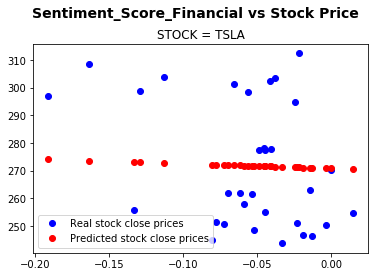

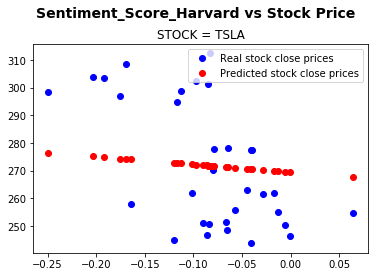

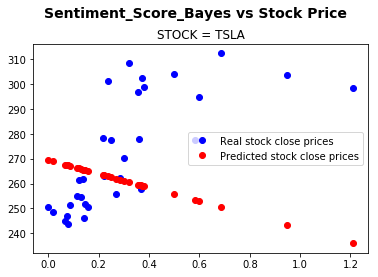

In [6]:
import matplotlib.pyplot as plt

# plot the results
def plot(model_name, price_idx, w_value, b_value, color): 
    fig = plt.figure()
    fig.suptitle(model_name, fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_title('STOCK = ' + STOCK)
    X, Y = train_data.T[price_idx], train_data.T[STOCK_PRICE_COLUMN]
    ax.plot(X, Y, color, label='Real stock close prices')
    ax.plot(X, (X * w_value) + b_value, 'ro', label='Predicted stock close prices')
    ax.legend()
    plt.show()
    
plot('Sentiment_Score_Financial vs Stock Price', SENTIMENT_SCORE_FINANCIAL_COLUMN, w1_value, b1_value , 'bo')
plot('Sentiment_Score_Harvard vs Stock Price', SENTIMENT_SCORE_HARVARD_COLUMN, w2_value, b2_value , 'bo')
plot('Sentiment_Score_Bayes vs Stock Price', SENTIMENT_SCORE_BAYES_COLUMN, w2_value, b2_value , 'bo')

In [ ]:
# RESULTS (stock: TSLA)
# 1. Harvard dictionary performed better in terms of accuracy of prediction compared to Harvard dictionary partly 
# because of better vocabulary in the dictionary resulting better sentiment scores
# 2. Naive Bayes pattern appears clearly not linear, but more like a cubic. We will run a cubic regression to confirm this.
# see cubic_regression.ipynb
